## Masking / clipping raster

In [1]:
import rasterio

from rasterio.plot import show

from rasterio.plot import show_hist

from rasterio.mask import mask

from shapely.geometry import box

import geopandas as gpd

from fiona.crs import from_epsg

import pycrs

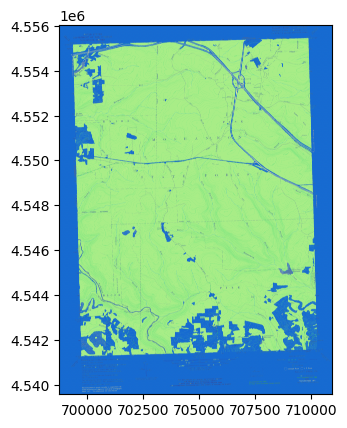

<Axes: >

In [3]:
# Filepaths
out_tif = "o41078a5.tif"
fp = "o41078a5.tif"

data = rasterio.open(fp)
# Plot the data
show((data, 1), cmap='terrain')

# Create 3D Surface from This TIFF

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [5]:
fp = "o41078a5.tif"

with rasterio.open(fp) as src:
    band1 = src.read(1)


In [6]:
rows, cols = band1.shape
x = np.arange(cols)
y = np.arange(rows)
x, y = np.meshgrid(x, y)


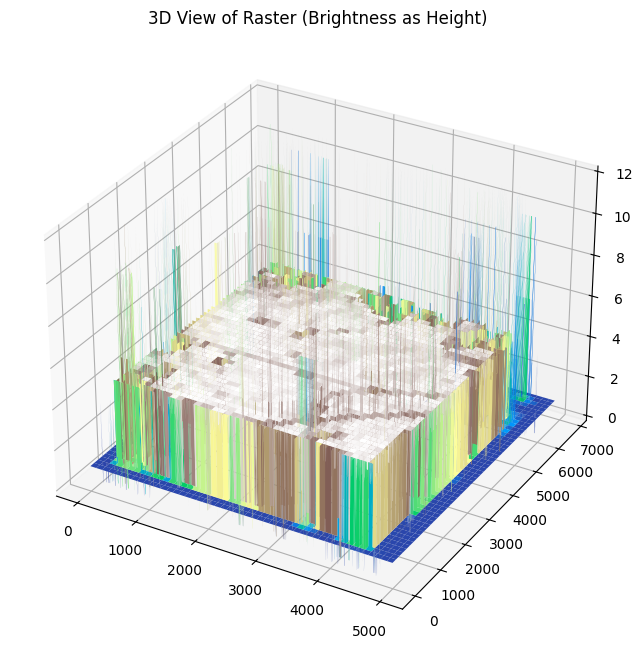

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, band1, cmap='terrain')

ax.set_title("3D View of Raster (Brightness as Height)")
plt.show()


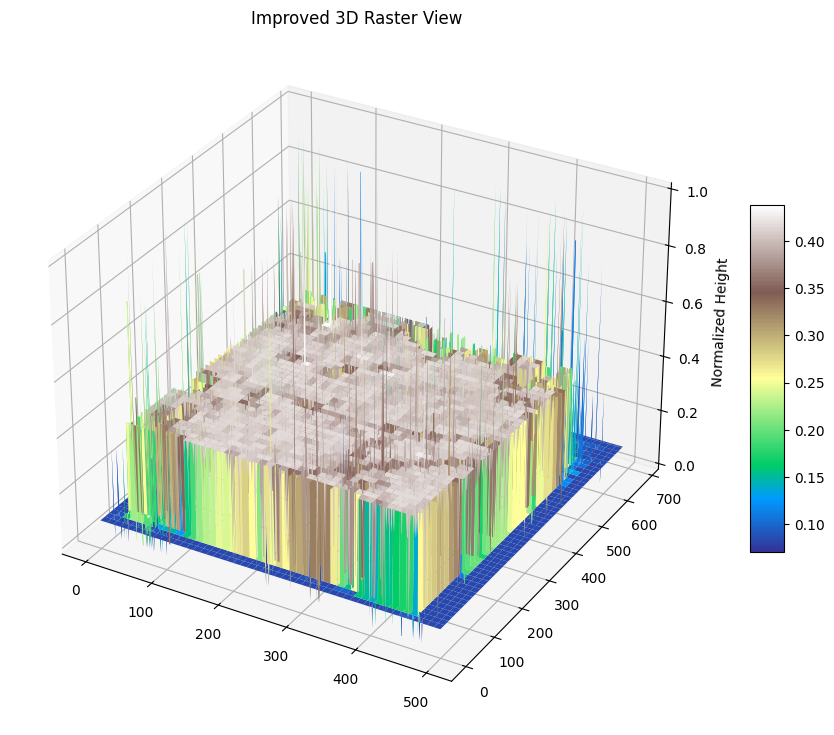

: 

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# 1. Load Raster
# -----------------------------
fp = "o41078a5.tif"   # change if needed

with rasterio.open(fp) as src:
    band1 = src.read(1)

# -----------------------------
# 2. Clean & Normalize Data
# -----------------------------
band1 = band1.astype(float)

# Remove extreme spikes
band1[band1 < 0] = 0

# Normalize height for better visualization
band1 = (band1 - np.min(band1)) / (np.max(band1) - np.min(band1))

# -----------------------------
# 3. Reduce Resolution (IMPORTANT)
# -----------------------------
step = 10  # increase for smoother & faster plot

z = band1[::step, ::step]
rows, cols = z.shape

x = np.arange(cols)
y = np.arange(rows)
x, y = np.meshgrid(x, y)

# -----------------------------
# 4. Plot 3D Surface
# -----------------------------
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(
    x,
    y,
    z,
    cmap='terrain',
    linewidth=0,
    antialiased=True
)

ax.set_title("Improved 3D Raster View")
ax.set_zlabel("Normalized Height")

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()
